## Breadth First Search

In [2]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    
    while queue:
        vertex = queue.popleft()
        if vertex not in visited:
            visited.add(vertex)
            print(vertex)
            neighbors = graph[vertex]
            for neighbor in neighbors:
                if neighbor not in visited:
                    queue.append(neighbor)

graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}
start_vertex = 'A'
bfs(graph, start_vertex)

A
B
C
D
E
F


## Depth First Search

In [3]:
from collections import defaultdict

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)  # Assuming an undirected graph

    def iterative_dfs(self, start, end):
        if start == end:
            return [start]
        visited = set()
        stack = [(start, [start])]
        while stack:
            current_vertex, path = stack.pop()
            visited.add(current_vertex)
            for neighbor in self.graph[current_vertex]:
                if neighbor not in visited:
                    if neighbor == end:
                        return path + [neighbor]
                    stack.append((neighbor, path + [neighbor]))
        return None  # No path found

# Example usage:
if __name__ == "__main__":
    g = Graph()
    g.add_edge(1, 2)
    g.add_edge(1, 3)
    g.add_edge(2, 4)
    g.add_edge(2, 5)
    g.add_edge(3, 6)
    g.add_edge(3, 7)
    g.add_edge(4, 8)
    g.add_edge(4, 9)
    g.add_edge(5, 10)
    g.add_edge(5, 11)
    g.add_edge(6, 12)
    g.add_edge(6, 13)
    g.add_edge(7, 14)
    g.add_edge(7, 15)
    
    start_node = 1
    end_node = 9
    shortest_path = g.iterative_dfs(start_node, end_node)
    if shortest_path:
        print(f"Shortest path from {start_node} to {end_node}: {shortest_path}")
    else:
        print(f"No path found from {start_node} to {end_node}")

Shortest path from 1 to 9: [1, 2, 4, 9]


## Recursive Best-First Search

In [4]:
from queue import PriorityQueue

class Node:
    def __init__(self, state, parent=None, f=float('inf')):
        self.state = state
        self.parent = parent
        self.f = f

def rbfs(start, goal):
    f_limit = float('inf')
    stack = [(Node(start, f=0), f_limit)]
    visited = set()
    
    while stack:
        (node, f) = stack.pop()
        visited.add(node.state)
        
        if node.state == goal:
            path = []
            cost = node.f
            while node is not None:
                path.append(node.state)
                node = node.parent
            return list(reversed(path)), cost
        
        successors = []
        for neighbor, cost in get_neighbors(node.state):
            if neighbor not in visited:
                child = Node(neighbor, parent=node)
                child.f = max(child.parent.f, cost)
                successors.append(child)
        
        if len(successors) == 0:
            continue
        
        successors.sort(key=lambda x: x.f)
        best = successors[0]
        
        if best.f > f_limit:
            return None, best.f
        
        alternative = successors[1].f if len(successors) > 1 else float('inf')
        stack.append((best, min(f_limit, alternative)))
    
    return None, float('inf')

def get_neighbors(state):
    successors = {
        1: [(2, 3), (3, 5)],
        2: [(1, 3), (4, 7)],
        3: [(1, 5), (5, 2)],
        4: [(2, 7), (6, 4)],
        5: [(3, 2), (7, 6)],
        6: [(4, 4), (8, 8)],
        7: [(5, 6), (8, 5)],
        8: [(6, 8), (7, 5)],
    }
    return successors.get(state, [])

if __name__ == '__main__':
    start_state = 1
    goal_state = 8
    path, cost = rbfs(start_state, goal_state)
    
    if path is not None:
        print(f"Optimal path from {start_state} to {goal_state}:")
        print(" -> ".join(map(str, path)))
        print(f"Total cost: {cost}")
    else:
        print("No path found.")

Optimal path from 1 to 8:
1 -> 2 -> 4 -> 6 -> 8
Total cost: 8


## Decision Tree Learning

Accuracy: 1.00


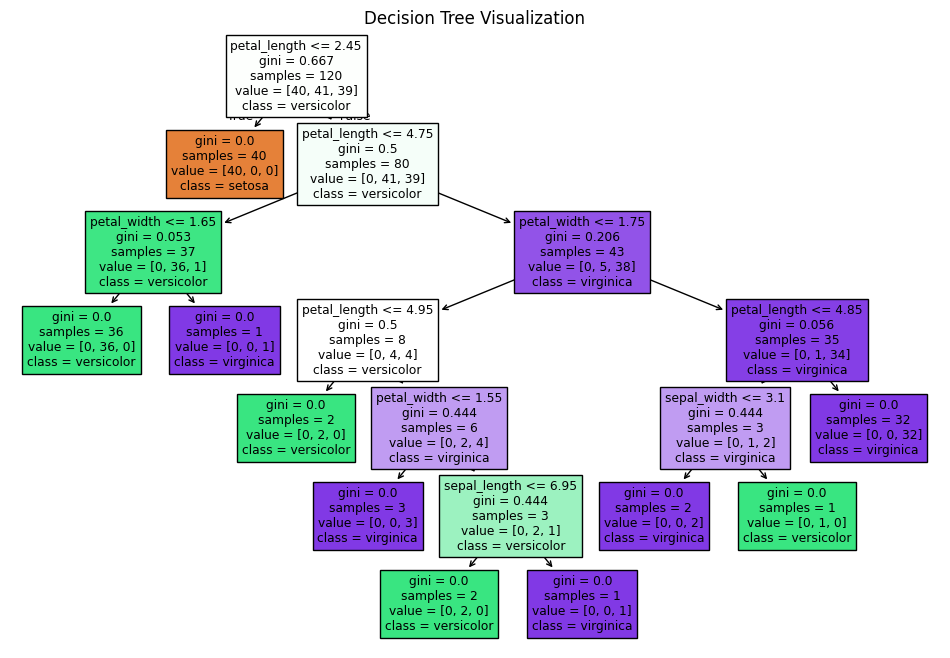

In [5]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

data = sns.load_dataset('iris')

X = data.drop('species', axis=1)
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=y.unique().astype(str))
plt.title("Decision Tree Visualization")
plt.show()

## Support Vector Machines

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
data = sns.load_dataset('iris')
X = data.drop('species', axis=1)
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
svm_classifier = SVC(kernel='linear') # You can choose
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


## Naïve Bayes Classifier

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [9]:
import pandas as pd
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

print("Raza Luswala 621")

data = pd.read_csv("ds4(2).csv")
heart_disease = pd.DataFrame(data)
print(data)

model = BayesianModel([
    ('age', 'Lifestyle'),
    ('Gender', 'Lifestyle'),
    ('Family', 'heartdisease'),
    ('diet', 'cholestrol'),
    ('Lifestyle', 'diet'),
    ('cholestrol', 'heartdisease'),
    ('diet', 'cholestrol')
])

model.fit(heart_disease, estimator=MaximumLikelihoodEstimator)
HeartDisease_infer = VariableElimination(model)

print('For Age enter SuperSeniorCitizen:0, SeniorCitizen:1, MiddleAged:2, Youth:3, Teen:4')
print('For Gender enter Male:0, Female:1')
print('For Family History enter Yes:1, No:0')
print('For Diet enter High:0, Medium:1')
print('for LifeStyle enter Athlete:0, Active:1, Moderate:2, Sedentary:3')
print('for Cholesterol enter High:0, BorderLine:1, Normal:2')

q = HeartDisease_infer.query(variables=['heartdisease'], 
    evidence={
        'age': int(input('Enter Age: ')),
        'Gender': int(input('Enter Gender: ')),
        'Family': int(input('Enter Family History: ')),
        'diet': int(input('Enter Diet: ')),
        'Lifestyle': int(input('Enter Lifestyle: ')),
        'cholestrol': int(input('Enter Cholestrol: '))
    })
print(q)

iris = load_iris()
print(iris)
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Raza Luswala 621")

Raza Luswala 621
    age  Gender  Family  diet  Lifestyle  cholestrol  heartdisease
0     0       0       1     1          3           0             1
1     0       1       1     1          3           0             1
2     1       0       0     0          2           1             1
3     4       0       1     1          3           2             0
4     3       1       1     0          0           2             0
5     2       0       1     1          1           0             1
6     4       0       1     0          2           0             1
7     0       0       1     1          3           0             1
8     3       1       1     0          0           2             0
9     1       1       0     0          0           2             1
10    4       1       0     1          2           0             1
11    4       0       1     1          3           2             0
12    2       1       0     0          0           0             0
13    2       0       1     1          1     

+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.0000 |
+-----------------+---------------------+
| heartdisease(1) |              1.0000 |
+-----------------+---------------------+
Raza Luswala 621
Raza Luswala 621
{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.

## KNN

Sami Don
x= [4, 5, 10, 4, 3, 11, 14, 8, 10, 12]
y= [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes= [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]


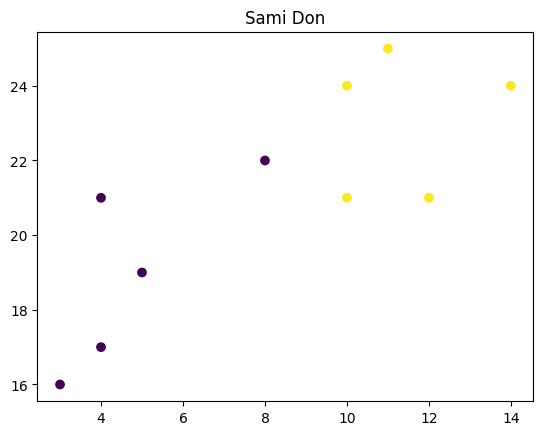

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (8, 22), (10, 21), (12, 21)]


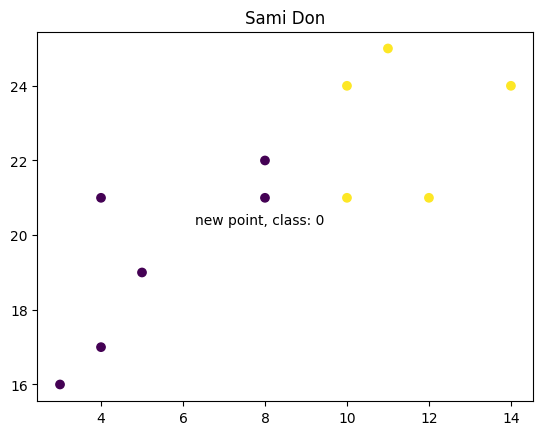

[1]


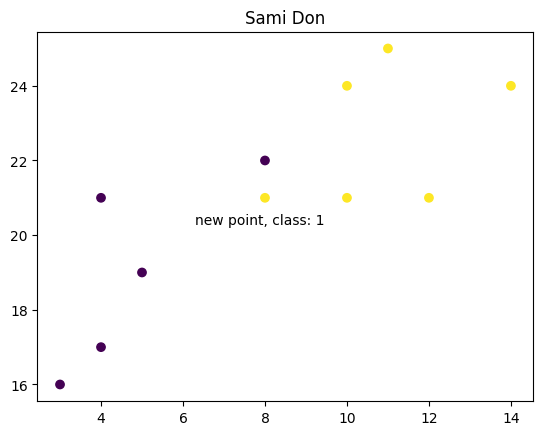

In [14]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
print("Sami Don")
x = [4, 5, 10, 4, 3, 11, 14, 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]
print("x=",x)
print("y=",y)
print("classes=", classes)
#To plot data set
plt.scatter(x, y, c=classes)
plt.title("Sami Don")
plt.show()

data = list(zip(x, y))
print(data)
#model creation
model = KNeighborsClassifier(n_neighbors=1)
# Model is trained
model.fit(data, classes)
new_x = 8
new_y = 21
new_point = [(new_x, new_y)]
prediction = model.predict(new_point)
plt.title("Sami Don")
plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

model = KNeighborsClassifier(n_neighbors=5)
model.fit(data, classes)
prediction = model.predict(new_point)
print(prediction)
plt.title("Sami Don")
plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()


##  TensorFlow Tools

In [12]:
import tensorflow as tf
import numpy as np  # Added import for NumPy
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

emails = [
    "Buy cheap watches! Free shipping!",
    "Meeting for lunch today?",
    "Claim your prize! You've won $1,000,000!",
    "Important meeting at 3 PM.",
]
labels = [1, 0, 1, 0]

max_words = 1000
max_len = 50
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(emails)
sequences = tokenizer.texts_to_sequences(emails)
X_padded = pad_sequences(sequences, maxlen=max_len, padding="post", truncating="post")

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=16, input_length=max_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

training_data = np.array(X_padded)
training_labels = np.array(labels)

model.fit(training_data, training_labels, epochs=10)  # You can adjust the number of epochs

file_path = "not_span.txt"
with open(file_path, "r", encoding="utf-8") as file:
    sample_email_text = file.read()

sequences_sample = tokenizer.texts_to_sequences([sample_email_text])
sample_email_padded = pad_sequences(sequences_sample, maxlen=max_len, padding="post", truncating="post")

prediction = model.predict(sample_email_padded)

threshold = 0.5

if prediction > threshold:
    print(f"Sample Email ('{file_path}'): SPAM")
else:
    print(f"Sample Email ('{file_path}'): NOT SPAM")

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6897
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7500 - loss: 0.6817
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.6744
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.6697
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 1.0000 - loss: 0.6651
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.6606
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.6552
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.6500
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.6445
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.6387
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Sample Email ('not_span.txt'): NOT SPAM


## A* Search

In [15]:
import heapq

# Define the map of Romania with distances between cities
romania_map = {
    'Arad': {'Zerind': 75, 'Timisoara': 118, 'Sibiu': 140},
    'Zerind': {'Arad': 75, 'Oradea': 71},
    'Timisoara': {'Arad': 118, 'Lugoj': 111},
    'Sibiu': {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu Vilcea': 80},
    'Oradea': {'Zerind': 71, 'Sibiu': 151},
    'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
    'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
    'Rimnicu Vilcea': {'Sibiu': 80, 'Pitesti': 97, 'Craiova': 146},
    'Mehadia': {'Lugoj': 70, 'Drobeta': 75},
    'Drobeta': {'Mehadia': 75, 'Craiova': 120},
    'Craiova': {'Drobeta': 120, 'Rimnicu Vilcea': 146, 'Pitesti': 138},
    'Pitesti': {'Rimnicu Vilcea': 97, 'Craiova': 138, 'Bucharest': 101},
    'Bucharest': {'Fagaras': 211, 'Pitesti': 101, 'Giurgiu': 90, 'Urziceni': 85},
    'Giurgiu': {'Bucharest': 90},
    'Urziceni': {'Bucharest': 85, 'Hirsova': 98, 'Vaslui': 142},
    'Hirsova': {'Urziceni': 98, 'Eforie': 86},
    'Eforie': {'Hirsova': 86},
    'Vaslui': {'Urziceni': 142, 'Iasi': 92},
    'Iasi': {'Vaslui': 92, 'Neamt': 87},
    'Neamt': {'Iasi': 87}
}

class Node:
    def __init__(self, city, cost, parent=None):
        self.city = city
        self.cost = cost
        self.parent = parent

    def __lt__(self, other):
        return self.cost < other.cost

def heuristic(node, goal):
    return 0  # No need for heuristic in this case

def astar_search(graph, start, goal):
    open_list = []
    closed_set = set()
    heapq.heappush(open_list, start)
    
    while open_list:
        current_node = heapq.heappop(open_list)
        
        if current_node.city == goal.city:
            path = []
            while current_node:
                path.append(current_node.city)
                current_node = current_node.parent
            return path[::-1]  # Reverse the path to get it from start to goal
        
        closed_set.add(current_node.city)
        
        for neighbor, distance in graph[current_node.city].items():
            if neighbor not in closed_set:
                new_cost = current_node.cost + distance
                new_node = Node(neighbor, new_cost, current_node)
                heapq.heappush(open_list, new_node)
    
    return None  # No path found

start_city = 'Arad'
goal_city = 'Bucharest'
start_node = Node(start_city, 0)
goal_node = Node(goal_city, 0)
path = astar_search(romania_map, start_node, goal_node)

if path:
    print("Path found:", path)
else:
    print("No path found")

Path found: ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']


## Association rule

In [18]:
print("Ansari zamam,642")
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd
#Sample transaction dataset
dataset = [
['milk', 'bread', 'nuts'],
['milk', 'bread'],
['milk', 'eggs', 'nuts'],
['milk', 'bread', 'eggs'],
['bread', 'nuts'],
]
# Convert the dataset to a pandas DataFrame
df = pd.DataFrame (dataset)
print(df)
# Perform one-hot encoding (convert item to column)
df_encoded = pd.get_dummies (df, prefix='', prefix_sep='')
# Find frequent itemsets using Apriori
frequent_itemsets= apriori(df_encoded, min_support=0.5, use_colnames=True)
print(frequent_itemsets)
#Generate association rules
rules = association_rules (frequent_itemsets, metric="lift",
min_threshold=1.0)
print("\nAssociation Rules:")
print(rules)
print("Ansari zamam 642")

Ansari zamam,642
       0      1     2
0   milk  bread  nuts
1   milk  bread  None
2   milk   eggs  nuts
3   milk  bread  eggs
4  bread   nuts  None
   support       itemsets
0      0.8         (milk)
1      0.6        (bread)
2      0.6  (milk, bread)

Association Rules:
  antecedents consequents  antecedent support  consequent support  support  \
0      (milk)     (bread)                 0.8                 0.6      0.6   
1     (bread)      (milk)                 0.6                 0.8      0.6   

   confidence  lift  leverage  conviction  zhangs_metric  
0        0.75  1.25      0.12         1.6            1.0  
1        1.00  1.25      0.12         inf            0.5  
Ansari zamam 642
